In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##  <font color = 'red'> **Dataset 1: FUEL CONSUMPTION** </font>

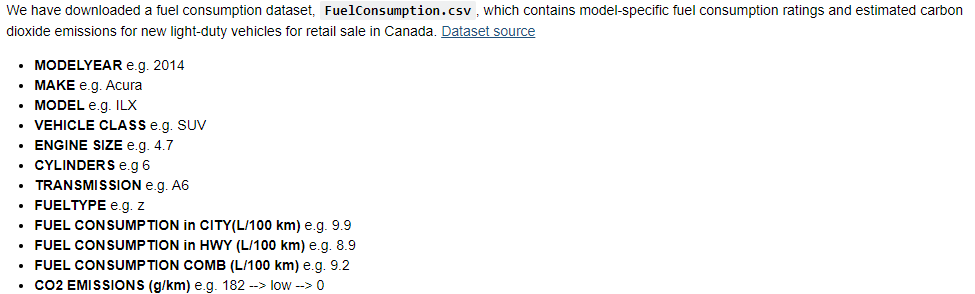

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-02-08 15:21:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2023-02-08 15:21:24 (1.12 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## **STEP 0: DATA EXPLORATION**

In [ ]:
df = pd.read_csv("FuelConsumption.csv")
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<ipython-input-20-4b3d483bf240>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, layout=(3,4), alpha=0.5);


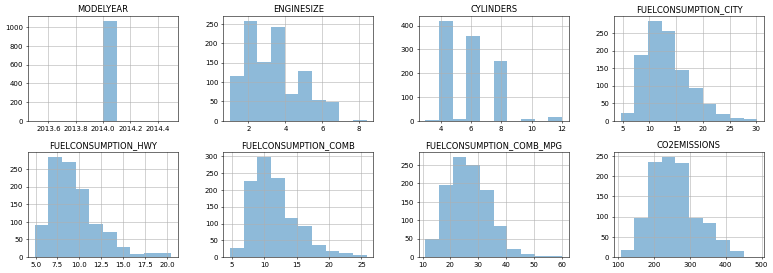

In [ ]:
fig, ax = plt.subplots(figsize=(19,10), dpi=50);
df.hist(ax=ax, layout=(3,4), alpha=0.5);

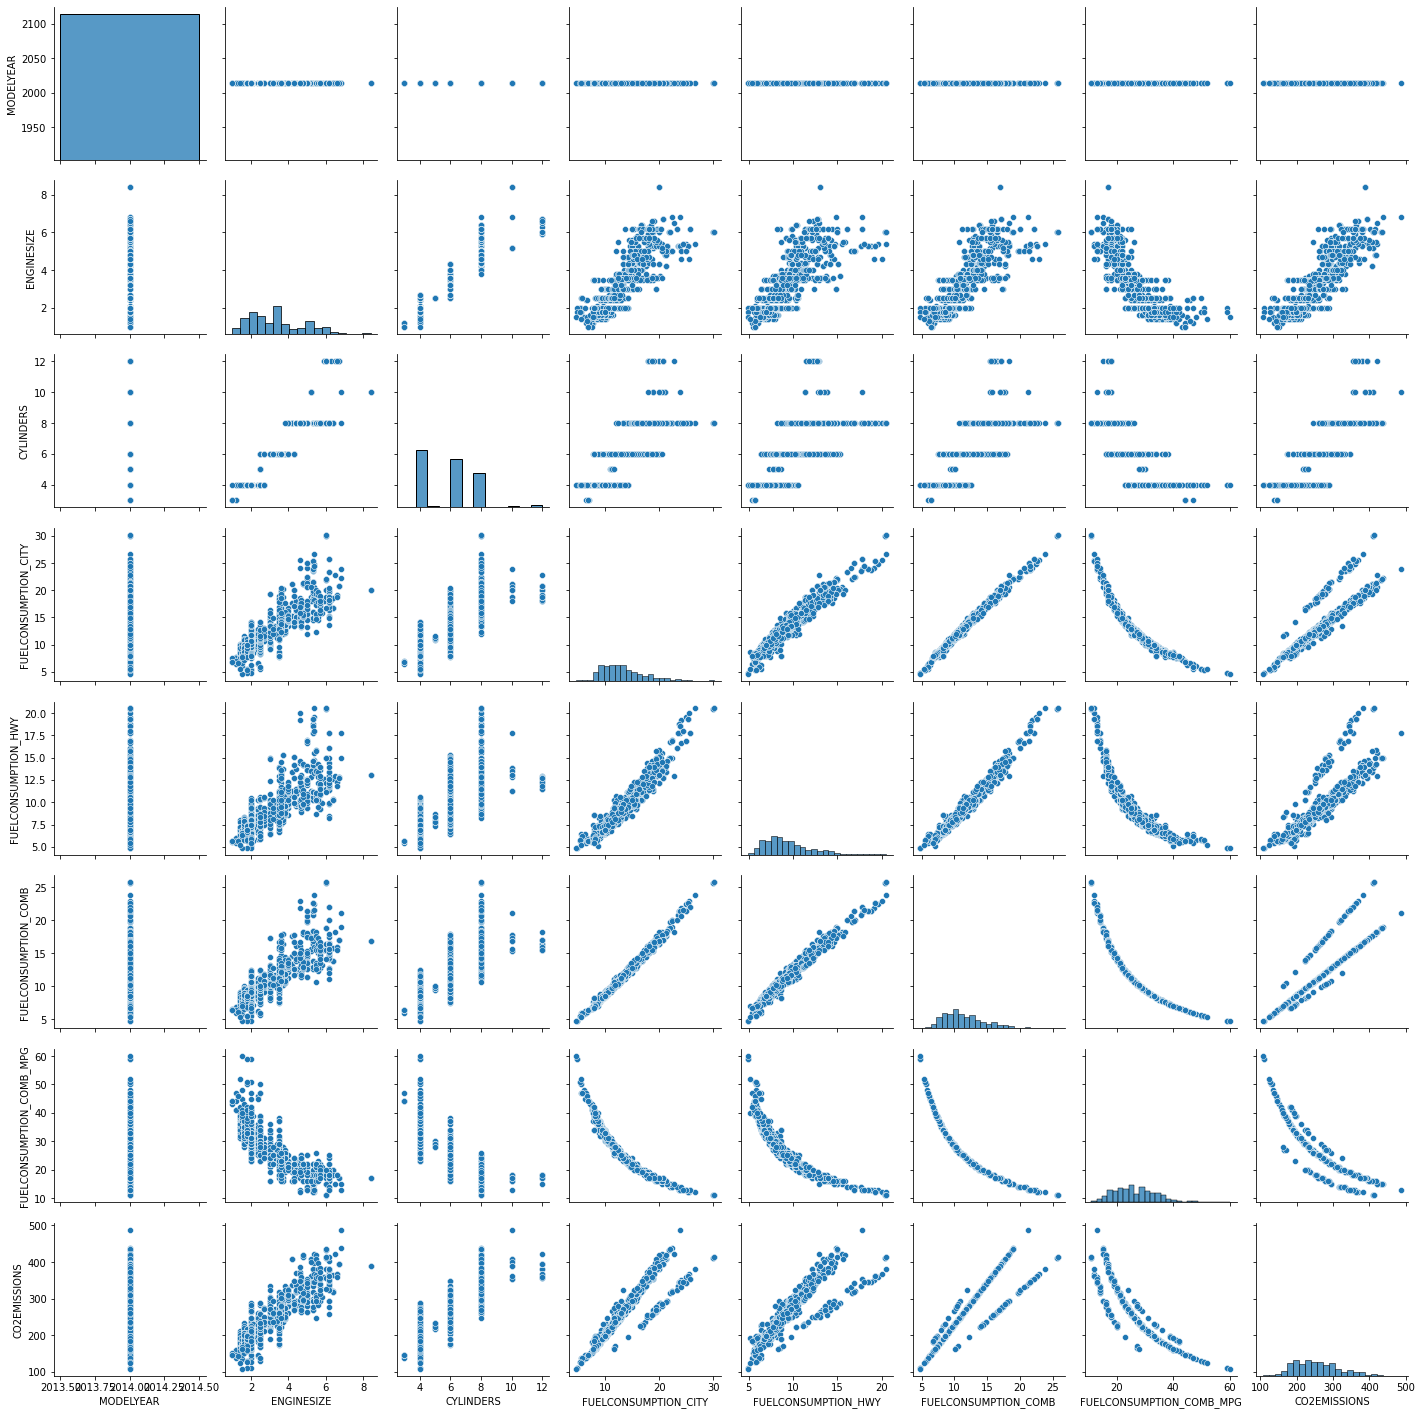

In [ ]:
sns.pairplot(df)

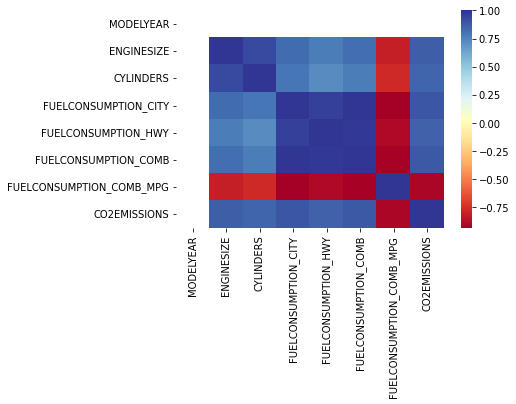

In [ ]:
sns.heatmap(df.corr(), cmap='RdYlBu')

## **STEP 1: PRE-PROCESSING**
REMOVING NULL-VALUES AND OUTLIERS

**1. Determing null values**

In [ ]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

**2. Determining Outliers**

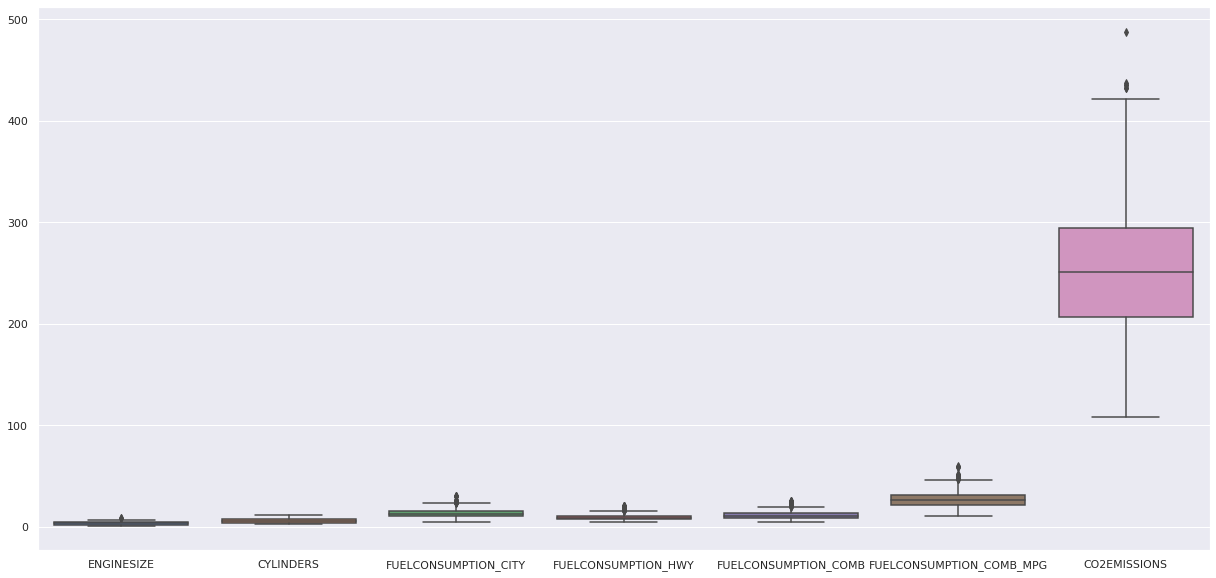

In [ ]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,1:])

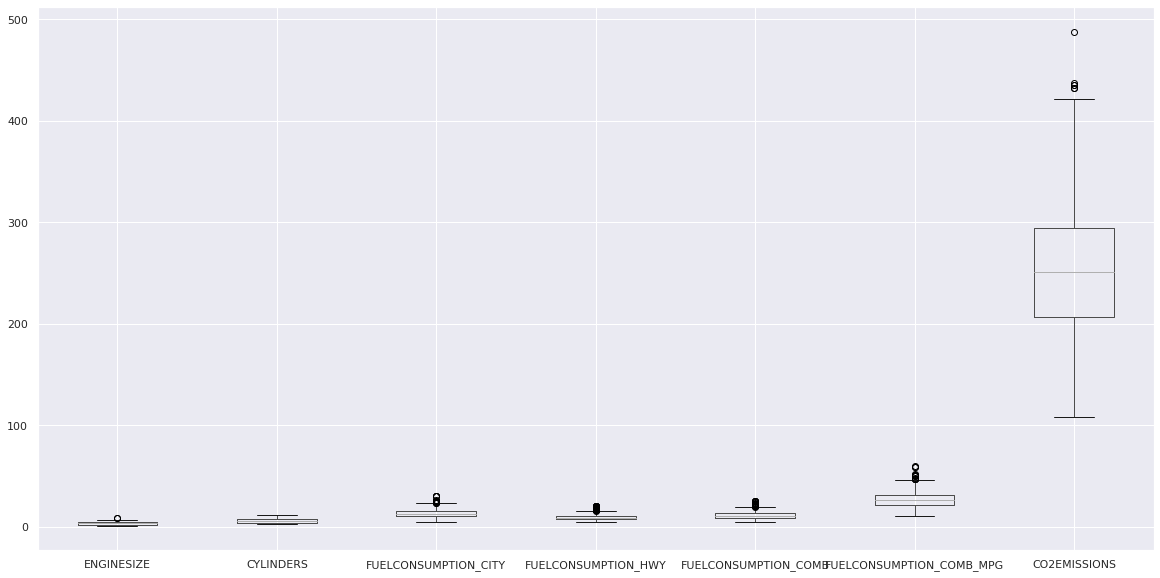

In [ ]:
df.iloc[:,1:].boxplot(figsize=(20,10))

## **STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)**

In [ ]:
#features = 'ENGINESIZE'
features =  ['ENGINESIZE', 'FUELCONSUMPTION_COMB']
X = df[features].values
Y = df['CO2EMISSIONS'].values

**FEATURE SCALING/ Standardization/ Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("Mean and Standard Deviation Before")
print(X.mean(), X.std())

#**********************************************
##### TO DO: Standardize X part [feature wise scaling!!!!!]
##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
#**********************************************

print("Mean and Standard Deviation After")
print(XScaled.mean(), XScaled.std())

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
#***************************************************************
######### SPLIT THE X AND Y into trainining and test partitions with 80%-20%split
#<Hint: Fix a random state so that same partition is generated everytime>
#****************************************************************
print("Dimensions of Original Data:")
print("Size(X):", X.shape, "; Size(Y)", Y.shape)
print("Dimensions of Training Data:")
print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
print("Dimensions of Test Data:")
print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)

Dimensions of Original Data:
Size(X): (1067, 2) ; Size(Y) (1067,)
Dimensions of Training Data:


NameError: ignored

#### HELP MODULE [NORMALIZATION!!!]

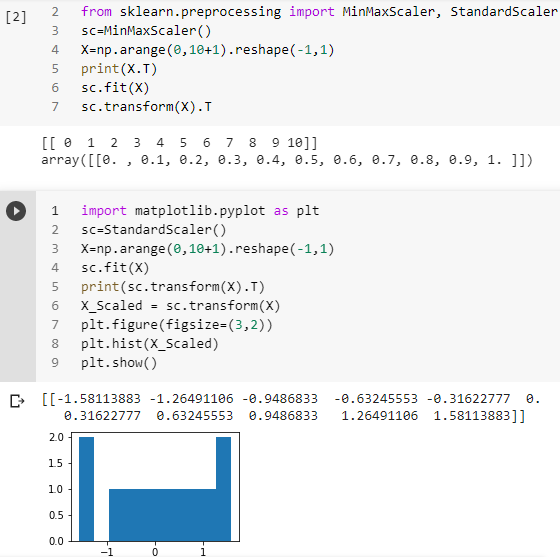

## **STEP 3: FITTING LINEAR REGRESSION MODEL ON TRAINING DATA**

### <font color='red'>**3.1 UNIVARIATE LINEAR REGRESSION**</font>

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

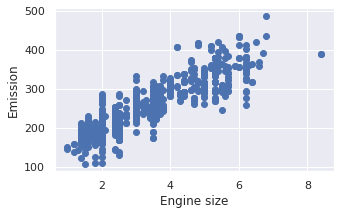

In [ ]:
X = X_train[:,0]
Y = Y_train
sns.set(rc={'figure.figsize':(5,3)})
plt.scatter(x = X, y = Y)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<font color='blue'>**A. ESTIMATING PARAMETERS USING ORDINARY LEAST SQUARE METHOD**:</font>
   
    Y_PRED = WX + B

    W = summation(x_i-x_mean)(y_i-y_mean) / summation(x_i-x_mean)^2
    B = y_mean - W*x_mean

In [ ]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
W = ????   #REGRESSION_COEFFICIENT
B = ?????    #INTERCEPT
print("Weight/Slope W:", W)
print("Bias/Intercept B:", B)

Weight/Slope W: 39.43709479349841
Bias/Intercept B: 124.50629875530709


Mean Squared Error: 956.40
Root Mean Squared Error: 30.93
R squared error: 0.69


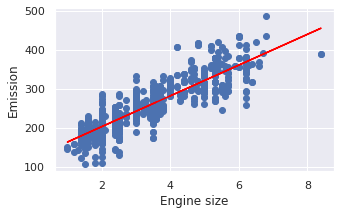

In [ ]:
from sklearn import metrics
Y_PRED = np.dot(W,X) + B
# REGRESSION EVALUATION METRICS!!!
print("Mean Squared Error (MSE): %.2f" % np.mean((Y_PRED - Y) ** 2))# metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error(RMSE): %.2f" % np.sqrt(np.mean((Y_PRED - Y) ** 2)))
print('R squared error (R2): %.2f' % metrics.r2_score(Y_PRED, Y))
#R-squared is not error, but is a popular metric for accuracy of your model.
#It represents how close the data are to the fitted regression line.
#The higher the R-squared, the better the model fits your data. Best possible score is 1.0
plt.scatter(x = X, y = Y)
plt.plot(X, Y_PRED, color  = "red")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<font color='blue'> **B. NORMAL EQUATION METHOD** </font>

$W = (X^TX)^{−1} X^TY$


In [ ]:
##### TO DO
##### 1. FIND PARAMETERS W AND B
##### The values should match the ones obtained above

print("Weight/Slope W:", W[1])
print("Bias/Intercept B:", W[0])

##### 2. Find value of Regression Evaluation Metrics: MSE, RMSE, R2
##### 3. Plot the data and regression line

<font color='blue'> **C. GRADIENT DESCENT METHOD** </font>

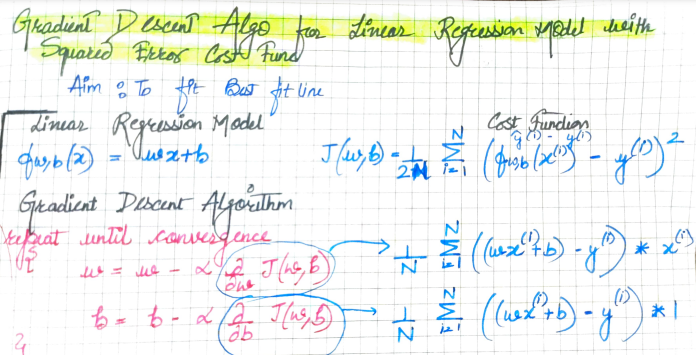

In [ ]:
def computeCost(X, Y, w, b):
    #### Compute cost J
    return J

def gradientDescent (X, Y, learningRate, numIterations):
    w, b = 0, 0
    errorList =[] ### Store cost in each iteration
    for i in range(numIterations):
        Y_pred = #COMPUTE f(X)
        ### compute updated w and b
        costJ = computeCost(X, Y, w, b)
        errorList.appen(costJ)

**Case 1: Using very low learning rate, say alpha=0.0001**

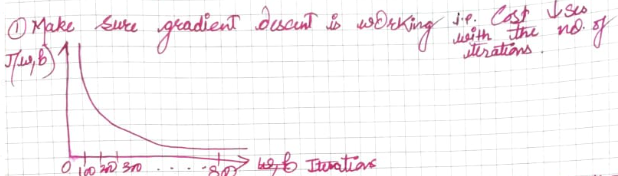

In [ ]:
w,b,errorList = gradientDescent (X, Y, 0.001, numIterations=5000)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error

**Case 2: Using very low learning rate, say alpha=0.1**

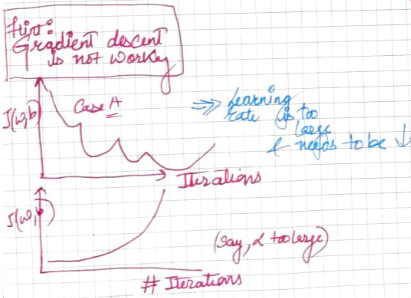

In [ ]:
w,b,errorList = gradientDescent (X, Y, 0.1, numIterations=10)
# Match w and b against the ones obtained in A and B part
# Plot iteration vs error

### <font color='red'>**3.2 MULTIPLE-VARIABLE LINEAR REGRESSION: FEATURES- ['ENGINESIZE', 'FUELCONSUMPTION_COMB']**</font>

In [ ]:
X = X_train
Y = Y_train
print(X.shape, Y.shape)

(853, 2) (853,)


<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING B PART: NORMAL EQUATION METHOD FOR X_train:** </font>

In [ ]:
##### TO DO

<font color='blue'> **ESTIMATE REGRESSION COEFFICIENTS BY REPEATING C PART: GRADIENT DESCENT METHOD FOR X_train:** </font>

In [ ]:
##### TO DO

*Optional: Try if you can come up with predicted equation represented through plane and points referring to dataset [Reference: Ankit]*
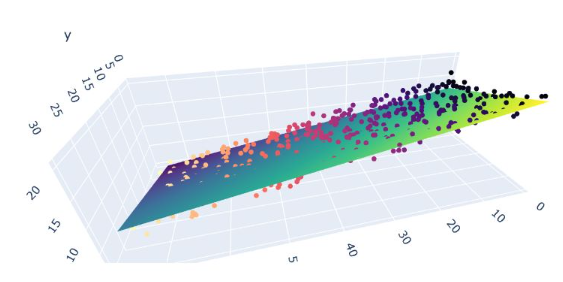

### <font color='red'>**3.3 LINEAR REGRESSION USING PRE-DEFINED LinearRegression Class**</font>

In [ ]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print("Weight/Slope W [W1, W2]:", LRModel.coef_)
print("Bias/Intercept B:", LRModel.intercept_)
coeff_df = pd.DataFrame(LRModel.coef_,df[features].columns,columns=['Coefficient'])
coeff_df


Weight/Slope W [W1, W2]: [19.09919012  9.9714327 ]
Bias/Intercept B: 76.9416677401949


,Coefficient
ENGINESIZE,19.099190
FUELCONSUMPTION_COMB,9.971433


## **STEP 4:Evaluating Performance of Model**

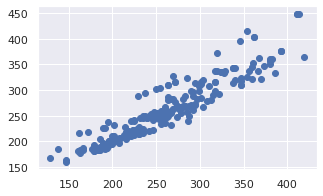

In [ ]:
Y_pred = LRModel.predict(X_test)
plt.scatter(Y_test,Y_pred)

<font color='blue'>**PERFORMANCE ON TEST PARTITION**</font>

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE: 16.70703194708533
MSE: 500.46905519471983
RMSE: 22.37116570933933
